Generating Content Interactions chart...


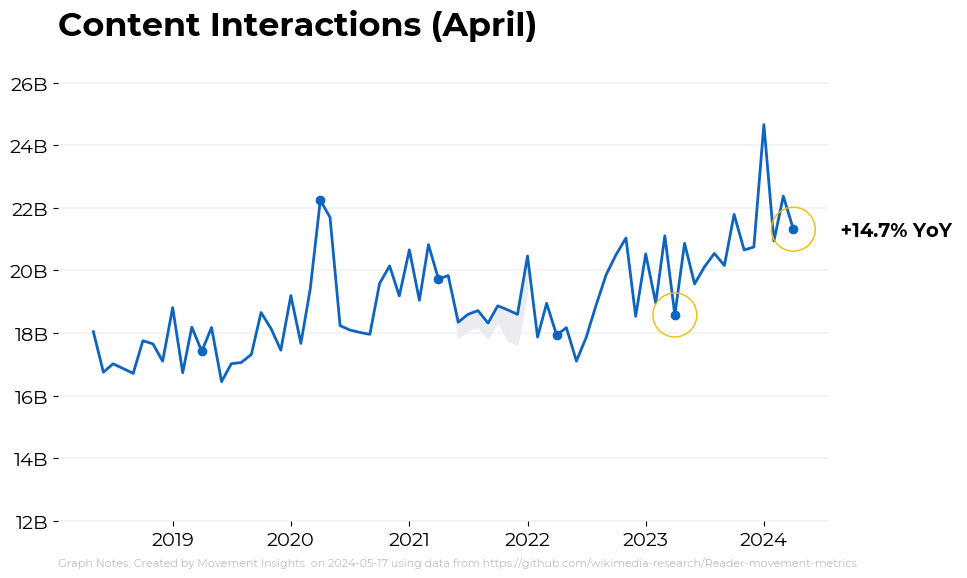

In [1]:
from wikicharts import Wikichart
import pandas as pd
from config import wmf_colors
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
from parameters import readers_data_path
import numpy as np

def main():
    print("Generating Content Interactions chart...")

    #---PARAMETERS---
    save_file_name = "Content_Interactions.png"
    yoy_note = " "
    display_flag = True

    #---CLEAN DATA--
    df = pd.read_csv(readers_data_path, sep='\t')
 
    corrected_df = pd.read_csv('resources/data/corrected_metrics_only.csv', sep=',')
    start_date = "2018-05-01"
    end_date = datetime.today()
    df['month'] = pd.to_datetime(df['month'])
    corrected_df['month'] = pd.to_datetime(corrected_df['month'])
    corrected_df.set_index('month')
    df = df[df["month"].isin(pd.date_range(start_date, end_date))]
    df['interactions_corrected'] = df['interactions']
    correction_range = pd.date_range(start='2021-05-01', end='2022-01-01', freq='MS')
    for m in correction_range:
        row_index = df[df['month'] == m].index 
        correct_row = corrected_df.loc[corrected_df['month'] ==  m]
        df.loc[row_index, 'interactions_corrected'] = correct_row['interactions_corrected'].values

    #---MAKE CHART---
    chart = Wikichart(start_date,end_date,df)
    chart.init_plot()
    chart.plot_data_loss('month','interactions','interactions_corrected',corrected_df)
    chart.plot_line('month','interactions_corrected',wmf_colors['blue'])
    chart.plot_monthlyscatter('month','interactions_corrected',wmf_colors['blue'])
    chart.plot_yoy_highlight('month','interactions_corrected')
    chart.format(title = f'Content Interactions',
        radjust=0.87,
        data_source="https://github.com/wikimedia-research/Reader-movement-metrics")
    chart.annotate(x='month',
        y='interactions_corrected',
        num_annotation=chart.calc_yoy(y='interactions_corrected'))
    chart.finalize_plot(save_file_name,display=display_flag)
    
    
    

if __name__ == "__main__":
    main()

Generating Content Interactions chart by User and Automated...


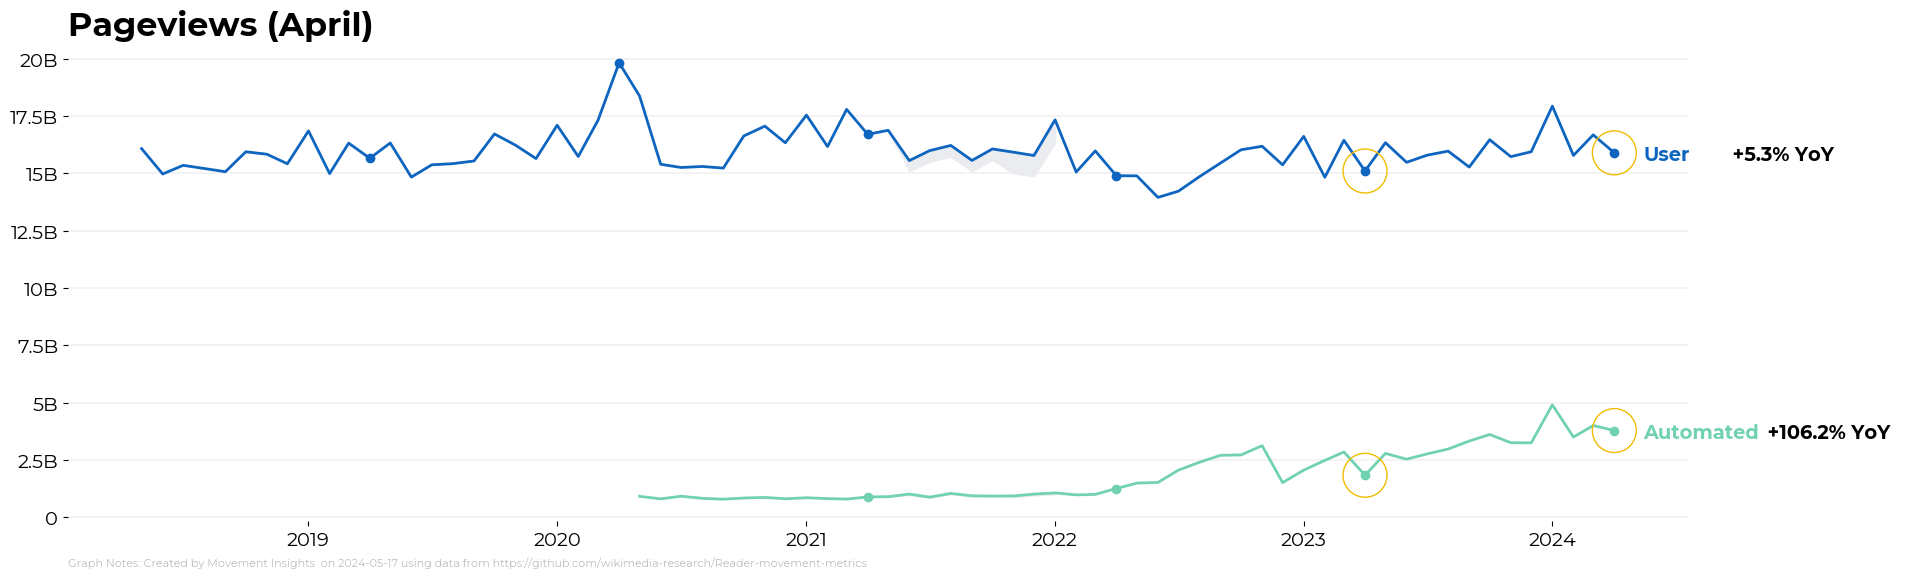

In [2]:
# Content interactions and Pageviews

def main():
    print("Generating Content Interactions chart by User and Automated...")

    #---PARAMETERS---
    save_file_name = "Pageviews_User_vs_Automated.png"
    yoy_note = " "
    display_flag = True

    #---CLEAN DATA--
    df = pd.read_csv(readers_data_path, sep='\t')
 
    corrected_df = pd.read_csv('resources/data/corrected_metrics_only.csv', sep=',')
    start_date = "2018-05-01"
    end_date = datetime.today()
    df['month'] = pd.to_datetime(df['month'])
    corrected_df['month'] = pd.to_datetime(corrected_df['month'])
    corrected_df.set_index('month')
    df = df[df["month"].isin(pd.date_range(start_date, end_date))]
    df['interactions_corrected'] = df['interactions']
    df['automated_pageviews_corrected'] = df['automated_pageviews']
    df['total_pageview_corrected'] = df['total_pageview']
    correction_range = pd.date_range(start='2021-05-01', end='2022-01-01', freq='MS')
    for m in correction_range:
        row_index = df[df['month'] == m].index 
        correct_row = corrected_df[corrected_df['month'] == m]
        df.loc[row_index, 'interactions_corrected'] = correct_row['interactions_corrected'].values
        df.loc[row_index, 'automated_pageviews_corrected'] = correct_row['automated_pageviews_corrected'].values
        df.loc[row_index, 'total_pageview_corrected'] = correct_row['total_pageview_corrected'].values

    df['total_pageview_corrected'] = np.where(df['automated_pageviews_corrected'].notnull(), 
                                        df['total_pageview_corrected'] - df['automated_pageviews_corrected'], 
                                        df['total_pageview_corrected'])
    corrected_df['total_pageview_corrected'] = corrected_df['total_pageview_corrected'] - corrected_df['automated_pageviews_corrected']
    corrected_df['total_pageview'] = corrected_df['total_pageview'] - corrected_df['automated_pageviews']

    
    #---MAKE CHART---
    chart = Wikichart(start_date,end_date,df)
    chart.init_plot(width = 18)
    chart.plot_data_loss('month','automated_pageviews','automated_pageviews_corrected',corrected_df)
    chart.plot_data_loss('month','total_pageview','total_pageview_corrected',corrected_df)
    chart.plot_line('month','automated_pageviews_corrected',wmf_colors['brightgreen'])
    chart.plot_line('month','total_pageview_corrected',wmf_colors['blue'])
    chart.plot_monthlyscatter('month','total_pageview_corrected',wmf_colors['blue'])


    chart.plot_monthlyscatter('month','automated_pageviews_corrected',wmf_colors['brightgreen'])
    chart.plot_yoy_highlight('month','total_pageview_corrected')
    chart.plot_yoy_highlight('month','automated_pageviews_corrected')
    chart.format(title = f'Pageviews',
        radjust=0.87,
        data_source="https://github.com/wikimedia-research/Reader-movement-metrics")
 
    
    ys = ['automated_pageviews_corrected', 'total_pageview_corrected']
    
    key = pd.DataFrame({
        'labelname': ['Automated', 'User'],
        'color': [wmf_colors['brightgreen'], wmf_colors['blue']]
    }, index=ys)
    
    plt.subplots_adjust(right=1)  
    chart.multi_yoy_annotate(ys=ys, key=key, annotation_fxn=chart.calc_yoy, xpad = 1)
    chart.finalize_plot(save_file_name,display=display_flag)

if __name__ == "__main__":
    main()